# Logistic Regression

Despite the name Logistic Regression, it is used for classification. It calculates the probability p that an observation belongs to a binary class.

A logistic regression outputs probabilities. eg 

$p$ > 0.5 = data is labelled as 1

$p$ < 0.5 = data is labelled as 0

Note that a logistic regression produces a linear decision boundary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

In [2]:
diabetes_df = pd.read_csv('Data/diabetes_clean.csv')
print(diabetes_df.shape)
diabetes_df.head()

(768, 9)


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = diabetes_df[['bmi', 'age']].values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# predicting probabilities. Reurn the second col representing positive class
y_pred_probs = logreg.predict_proba(X_test)[:,1]

In [4]:
y_pred_probs

array([0.5070309 , 0.2621656 , 0.16851245, 0.17314983, 0.48962511,
       0.75732791, 0.06118489, 0.5155887 , 0.3488152 , 0.77754421,
       0.29148707, 0.73553166, 0.24463817, 0.49557303, 0.14015022,
       0.28708569, 0.38634521, 0.18340327, 0.26625394, 0.48185518,
       0.42999262, 0.26867141, 0.60834906, 0.21061803, 0.5042924 ,
       0.5214042 , 0.12810736, 0.07650244, 0.55045697, 0.33844965,
       0.76837356, 0.87166378, 0.42210972, 0.28703422, 0.83940948,
       0.37270675, 0.76754441, 0.3942258 , 0.5633834 , 0.52759004,
       0.17656511, 0.56901213, 0.77366522, 0.35926787, 0.0798041 ,
       0.24892124, 0.7551926 , 0.38637503, 0.42407778, 0.91035094,
       0.09152363, 0.54384401, 0.81479319, 0.15451958, 0.06958439,
       0.16687806, 0.6660114 , 0.00625412, 0.37032493, 0.44713573,
       0.48978224, 0.36222928, 0.3429759 , 0.34342946, 0.34661564,
       0.48757898, 0.15151695, 0.79914773, 0.06452179, 0.53323536,
       0.51278923, 0.26407026, 0.44095058, 0.33884396, 0.13196

By default, the threshold is 0.5 in logistic regression. The threshold can also apply to other models such as the KNN.

## ROC Curve

When the threshold equals zero, the model predicts one for all observations, meaning it will correctly predict all positive values, and incorrectly predict all negative values. If the threshold equals one, the model predicts zero for all data, which means that both true and false positive rates are zero. If we vary the threshold, we get a series of different false positive and true positive rates.

A line plot of the thresholds helps to visualize the trend. To plot the ROC curve, we import roc_curve from sklearn-dot-metrics. We then call the function roc_curve; we pass the test labels as the first argument, and the predicted probabilities as the second. We unpack the results into three variables: false positive rate, FPR; true positive rate, TPR; and the thresholds. We can then plot a dotted line from zero to one, along with the FPR and TPR;

How do we quantify the model's performance based on this plot? If we have a model with one for true positive rate and zero for false positive rate, this would be the perfect model. Therefore, we calculate the area under the ROC curve, a metric known as AUC. Scores range from zero to one, with one being ideal. 

c:\Users\Dave\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


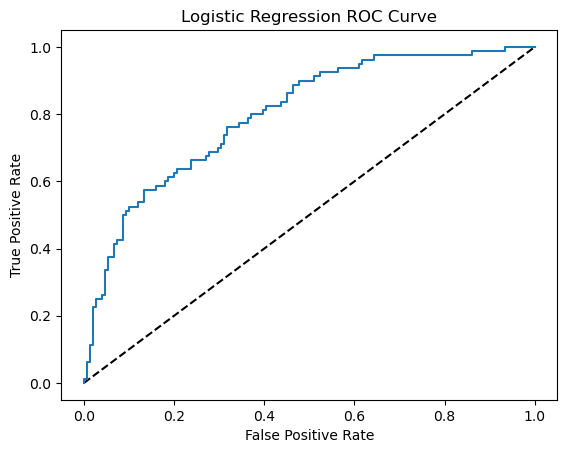

In [5]:
X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred_probs = logreg.predict_proba(X_test)[:,1]

fpr,tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

We can calculate AUC in scikit-learn by importing roc_auc_score from sklearn-dot-metrics. We call roc_auc_score, passing our test labels and our predicted probabilities, calculated by using the model's predict_proba method on X_test. 

In [6]:
print(roc_auc_score(y_test, y_pred_probs))

0.8002483443708608


In [7]:
# Calculate roc_auc_score
print('roc_auc_score')
print(roc_auc_score(y_test, y_pred_probs))
print()

# Calculate the confusion matrix
print('confusion_matrix')
print(confusion_matrix(y_test, y_pred))
print()

# Calculate the classification report
print('classification_report')
print(classification_report(y_test, y_pred))

roc_auc_score
0.8002483443708608

confusion_matrix
[[121  30]
 [ 30  50]]

classification_report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Noticed that logistic regression performs better than the KNN model across all the metrics calculated? A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.